In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Dataset ##
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

## EDA ##
-   Load the data.
-   Look at the median_house_value variable. Does it have a long tail?

In [2]:
df_housing = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
print(df_housing.shape)
df_housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


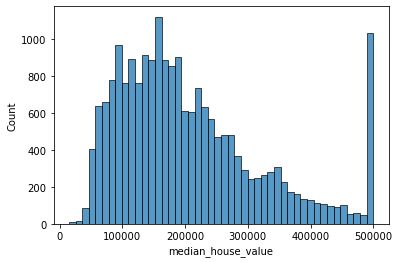

In [4]:
sns.histplot(df_housing.median_house_value);

## Features ##

For the rest of the homework, you'll need to use only these columns:
-   'latitude',
-   'longitude',
-   'housing_median_age',
-   'total_rooms',
-    'total_bedrooms',
-   'population',
-   'households',
-   'median_income',
-   'median_house_value'

In [5]:
features = [
    'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'median_house_value'
]
df = df_housing[features]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1
Find a feature with missing values. How many missing values does it have?
-   207
-   307
-   408
-   508

In [6]:
df.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [7]:
print(f"Number of missing values in the feature 'total_bedrooms': {df.total_bedrooms.isna().sum()}")

Number of missing values in the feature 'total_bedrooms': 207


## Question 2

What's the median (50% percentile) for variable 'population'?
-   1133
-   1122
-   1166
-   1188

In [8]:
print(f"Median for the variable 'population' is: {round(df.population.median())}")

Median for the variable 'population' is: 1166


## Split the data
-   Shuffle the initial dataset, use seed 42.
-   Split your data in train/val/test sets, with 60%/20%/20% distribution.
-   Make sure that the target value ('median_house_value') is not in your dataframe.
-   Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
n = len(df)
print(f"Number of records (rows): {n}")

Number of records (rows): 20640


In [10]:
n_valid = int(0.2*n)
n_test = int(0.2*n)
n_train = n - n_valid - n_test
print(f"Number of records for training, validation and testing: {n_train, n_valid, n_test}")

Number of records for training, validation and testing: (12384, 4128, 4128)


In [11]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [12]:
df_train = df.iloc[idx[:n_train]]
df_valid = df.iloc[idx[n_train:n_train+n_valid]]
df_test = df.iloc[idx[n_train+n_valid:]]

In [13]:
print(df_train.shape)
df_train.head()

(12384, 9)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [14]:
print(df_valid.shape)
df_valid.head()

(4128, 9)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19660,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
4415,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
18113,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
17673,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
16992,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0


In [15]:
print(df_test.shape)
df_test.head()

(4128, 9)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9221,37.13,-120.26,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
10234,33.86,-117.91,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
4763,34.04,-118.36,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
9062,34.69,-118.15,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
1874,38.93,-119.97,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0


In [16]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = np.log1p(df_train.median_house_value)
y_valid = np.log1p(df_valid.median_house_value)
y_test = np.log1p(df_test.median_house_value)
len(y_train), len(y_valid), len(y_test)

(12384, 4128, 4128)

In [18]:
del df_train['median_house_value']
del df_valid['median_house_value']
del df_test['median_house_value']

In [19]:
print(df_train.shape)
df_train.head()

(12384, 8)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [20]:
print(df_valid.shape)
df_valid.head()

(4128, 8)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531
1,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350
2,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830
3,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763
4,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434


## Question 3
-   We need to deal with missing values for the column from Q1.
-   We have two options: fill it with 0 or with the mean of this variable.
-   Try both options. For each, train a linear regression model without regularization using the code from the lessons.
-   For computing the mean, use the training only!
-   Use the validation dataset to evaluate the models and compare the RMSE of each option.
-   Round the RMSE scores to 2 decimal digits using round(score, 2)
-   Which option gives better RMSE?

Options:
-   With 0
-   With mean
-   Both are equally good

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv @ X.T) @ y
    
    return w_full[0], w_full[1:]

In [22]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [23]:
def prepare_X(df, fill):
    df_filled = df.fillna(fill)
    X = df_filled.values
    return X

In [24]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_valid = prepare_X(df_valid, 0)
y_pred = w0 + X_valid @ w
print(f"RMSE with missing values filled with zero: {round(rmse(y_valid, y_pred),2)}")

RMSE with missing values filled with zero: 0.33


In [25]:
mean_br = df_train.total_bedrooms.mean()
X_train = prepare_X(df_train, mean_br)
w0, w = train_linear_regression(X_train, y_train)

X_valid = prepare_X(df_valid, mean_br)
y_pred = w0 + X_valid @ w
print(f"RMSE with missing values filled with mean (of training dataset): {round(rmse(y_valid, y_pred),2)}")

RMSE with missing values filled with mean (of training dataset): 0.33


## Question 4
-   Now let's train a regularized linear regression.
-   For this question, fill the NAs with 0.
-   Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
-   Use RMSE to evaluate the model on the validation dataset.
-   Round the RMSE scores to 2 decimal digits.
-   Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:
-   0
-   0.000001
-   0.001
-   0.0001

In [26]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    XTX = X.T @ X
    XTX = XTX + r * np.identity(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv @ X.T) @ y
    
    return w_full[0], w_full[1:]

In [27]:
r_params = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r_val in r_params:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r_val)

    X_valid = prepare_X(df_valid,0)
    y_pred = w0 + X_valid @ w
    score = rmse(y_valid, y_pred)
    
    print(f"r={r_val:f} \t RMSE={round(score,2)}")

r=0.000000 	 RMSE=0.33
r=0.000001 	 RMSE=0.33
r=0.000100 	 RMSE=0.33
r=0.001000 	 RMSE=0.33
r=0.010000 	 RMSE=0.33
r=0.100000 	 RMSE=0.33
r=1.000000 	 RMSE=0.33
r=5.000000 	 RMSE=0.34
r=10.000000 	 RMSE=0.34


## Question 5
-   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
-   Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
-   For each seed, do the train/validation/test split with 60%/20%/20% distribution.
-   Fill the missing values with 0 and train a model without regularization.
-   For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
-   What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
-   Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:
-   0.16
-   0.00005
-   0.005
-   0.15555

In [28]:
scores = []

for seed in range(10):
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_valid = df.iloc[idx[n_train:n_train+n_valid]]
    df_test = df.iloc[idx[n_train+n_valid:]]
    
    df_train = df_train.reset_index(drop=True)
    df_valid = df_valid.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value)
    y_valid = np.log1p(df_valid.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    
    del df_train['median_house_value']
    del df_valid['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)

    X_valid = prepare_X(df_valid,0)
    y_pred = w0 + X_valid @ w
    score = rmse(y_valid, y_pred)

    scores.append(score)
    
print(scores)
std = np.std(scores)
print(f"\nStandard Deviation of the RMSE scores is: {round(std,3)}")

[0.3388430480529593, 0.33623872559558765, 0.33209123188440287, 0.34051536090355183, 0.33890240665726873, 0.34348667257195176, 0.3451980953098994, 0.3395989927404385, 0.3466230873192807, 0.33659261241921334]

Standard Deviation of the RMSE scores is: 0.004


## Question 6

-   Split the dataset like previously, use seed 9.
-   Combine train and validation datasets.
-   Fill the missing values with 0 and train a model with r=0.001.
-   What's the RMSE on the test dataset?

Options:
-   0.35
-   0.135
-   0.450
-   0.245

In [29]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]]
df_valid = df.iloc[idx[n_train:n_train+n_valid]]
df_test = df.iloc[idx[n_train+n_valid:]]

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train.median_house_value)
y_valid = np.log1p(df_valid.median_house_value)
y_test = np.log1p(df_test.median_house_value)
    
del df_train['median_house_value']
del df_valid['median_house_value']
del df_test['median_house_value']
    
df_full_train = pd.concat([df_train,df_valid]).reset_index(drop=True)
X_full_train = prepare_X(df_full_train,0)
y_full_train = np.concatenate([y_train,y_valid])
print(f"Shape of combined X: {X_full_train.shape}")
print(f"Shape of combined y: {y_full_train.shape}")

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test,0)
y_pred = w0 + X_test @ w
score = rmse(y_test, y_pred)
print(f"RMSE on test dataset: {score}")

Shape of combined X: (16512, 8)
Shape of combined y: (16512,)
RMSE on test dataset: 0.34531689143895106
